# Topic: Prediction of Diabetes using Machine Learning Models

# Import necessary libraries

In [2]:
# Import necessary libraries
import pandas as pd #To load, explore, and manage tabular data
import numpy as np #Used for numerical operations
import matplotlib.pyplot as plt #Used to create visualizations
import seaborn as sns #Count plots and heatmaps
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold #Used to split the data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score #used for evaluation
from sklearn.linear_model import LogisticRegression #Used to build logistic regression model
from sklearn.svm import SVC #Used to build support vector machine
from sklearn.neighbors import KNeighborsClassifier #Used to build KNeighborsClassifier to find best k
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score #Used to calculate model accuracy 
from scipy.stats import f_oneway #Used to test ANOVA F-test
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings
warnings.simplefilter(action="ignore")

# Load the CSV file

In [4]:
#Loadding the dataset.
df = pd.read_csv('diabetes.csv')

# Exploratory Data Analysis

In [6]:
#Print the first 5 rows of the datafframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# To display the data types of each column in the DataFrame.
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#To count the number of missing values inn each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#To generate summary statistics for numerical columns in the dataframe
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#Trasnspose above statistics for better readabiility.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
# To display summary of the dataframe
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [12]:
# Identify columns that contain at least one zero value and convert them to a list
columns_with_zeros = df.columns[(df == 0).any()].tolist()
print("Columns with zero values:", columns_with_zeros)

Columns with zero values: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']


In [13]:
#Created a deep copy of the original dataframe to avoid modifying it directly
df_copy = df.copy(deep=True)
#To replace zero values with NaN in specified columns where zero is not a valid measurement
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)
#Print the number of (NaN) values in each column after replacement
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


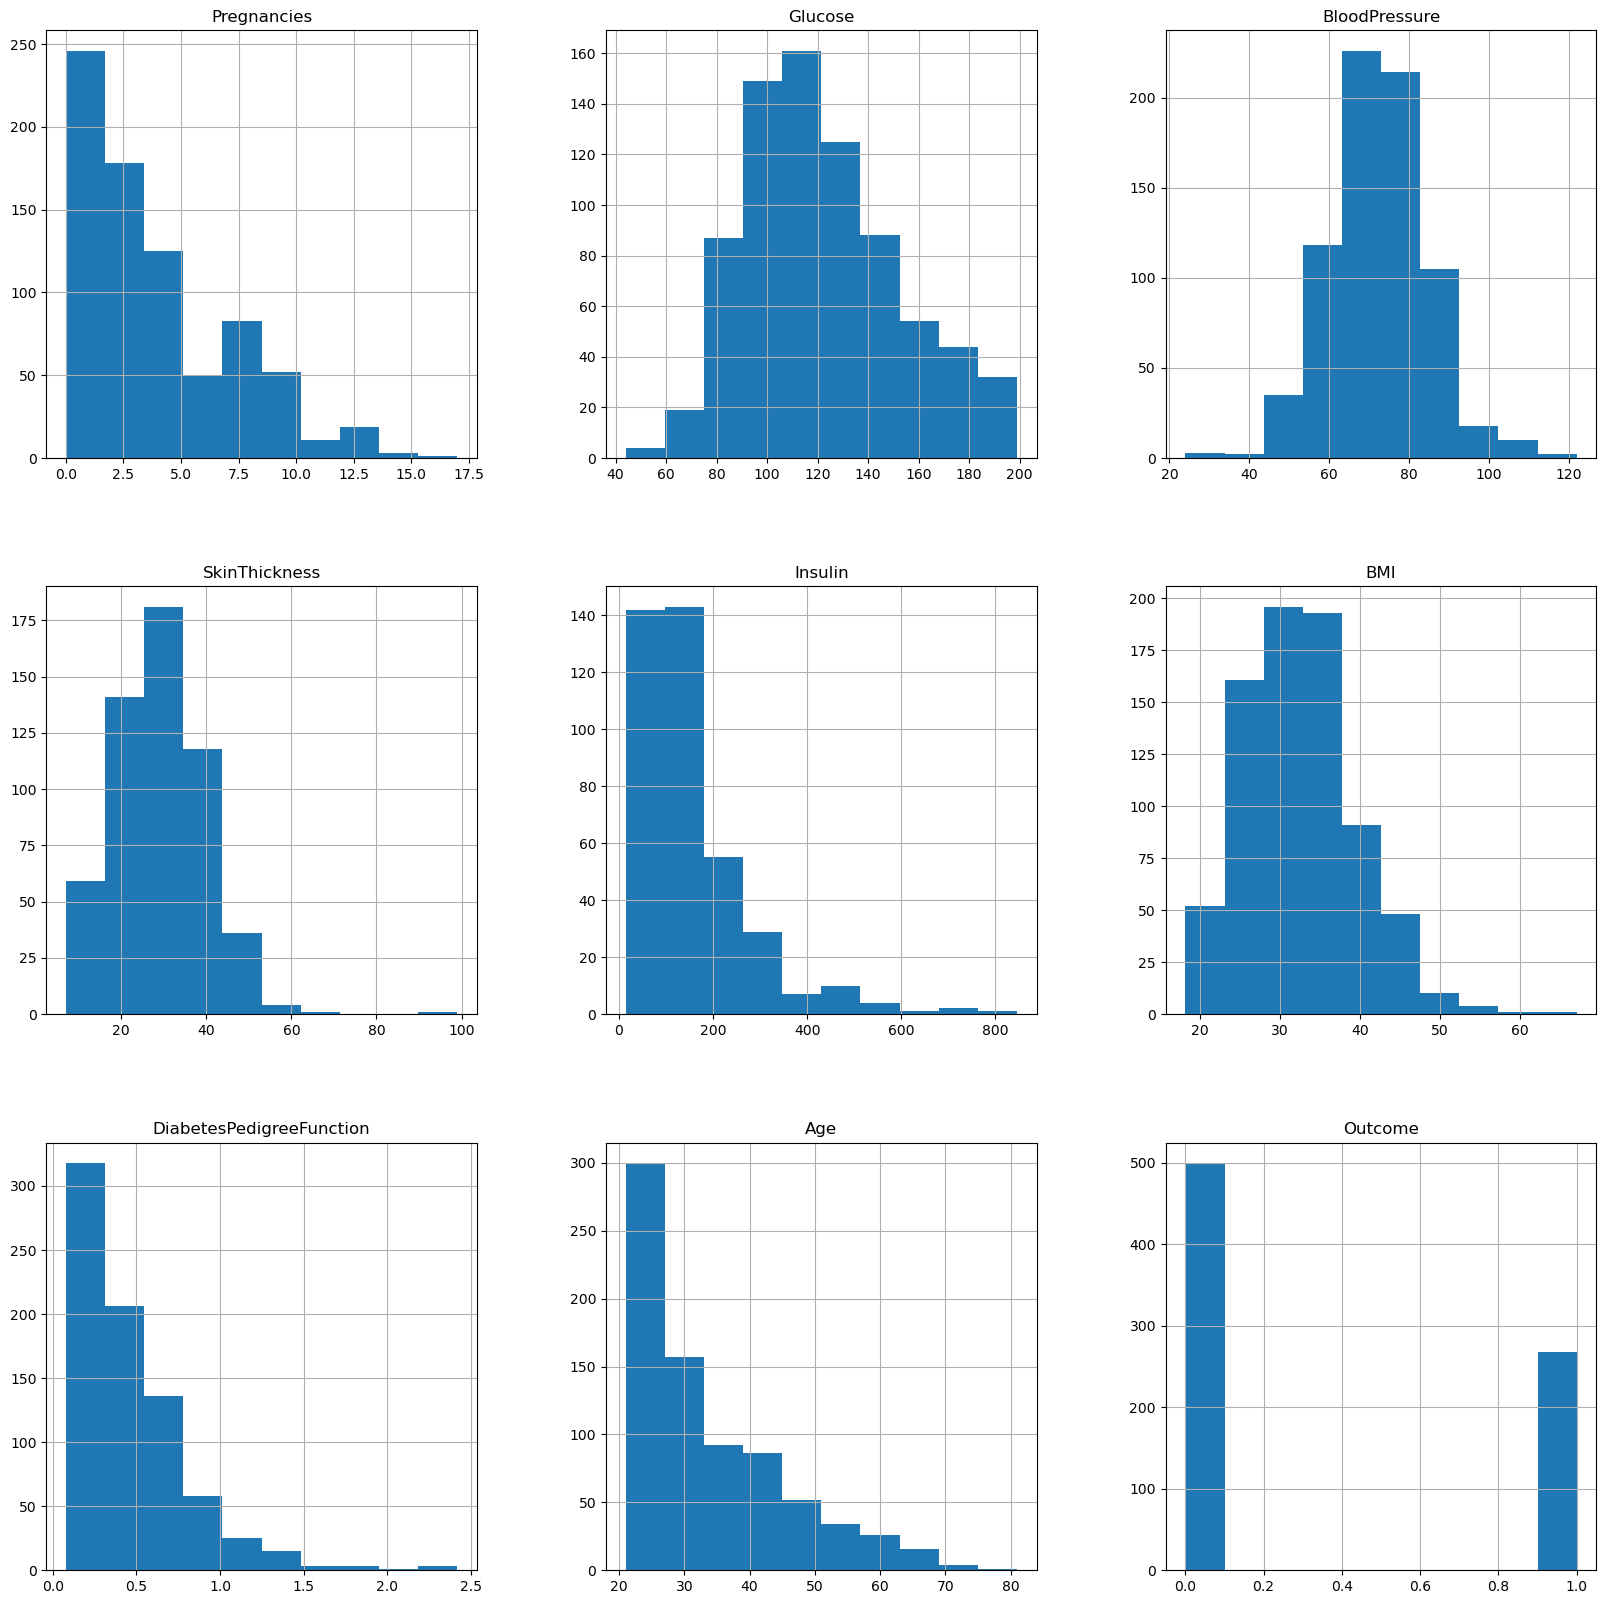

In [14]:
#Histogram analysis before filling missing values with mean or median
p = df_copy.hist(figsize = (20,20))

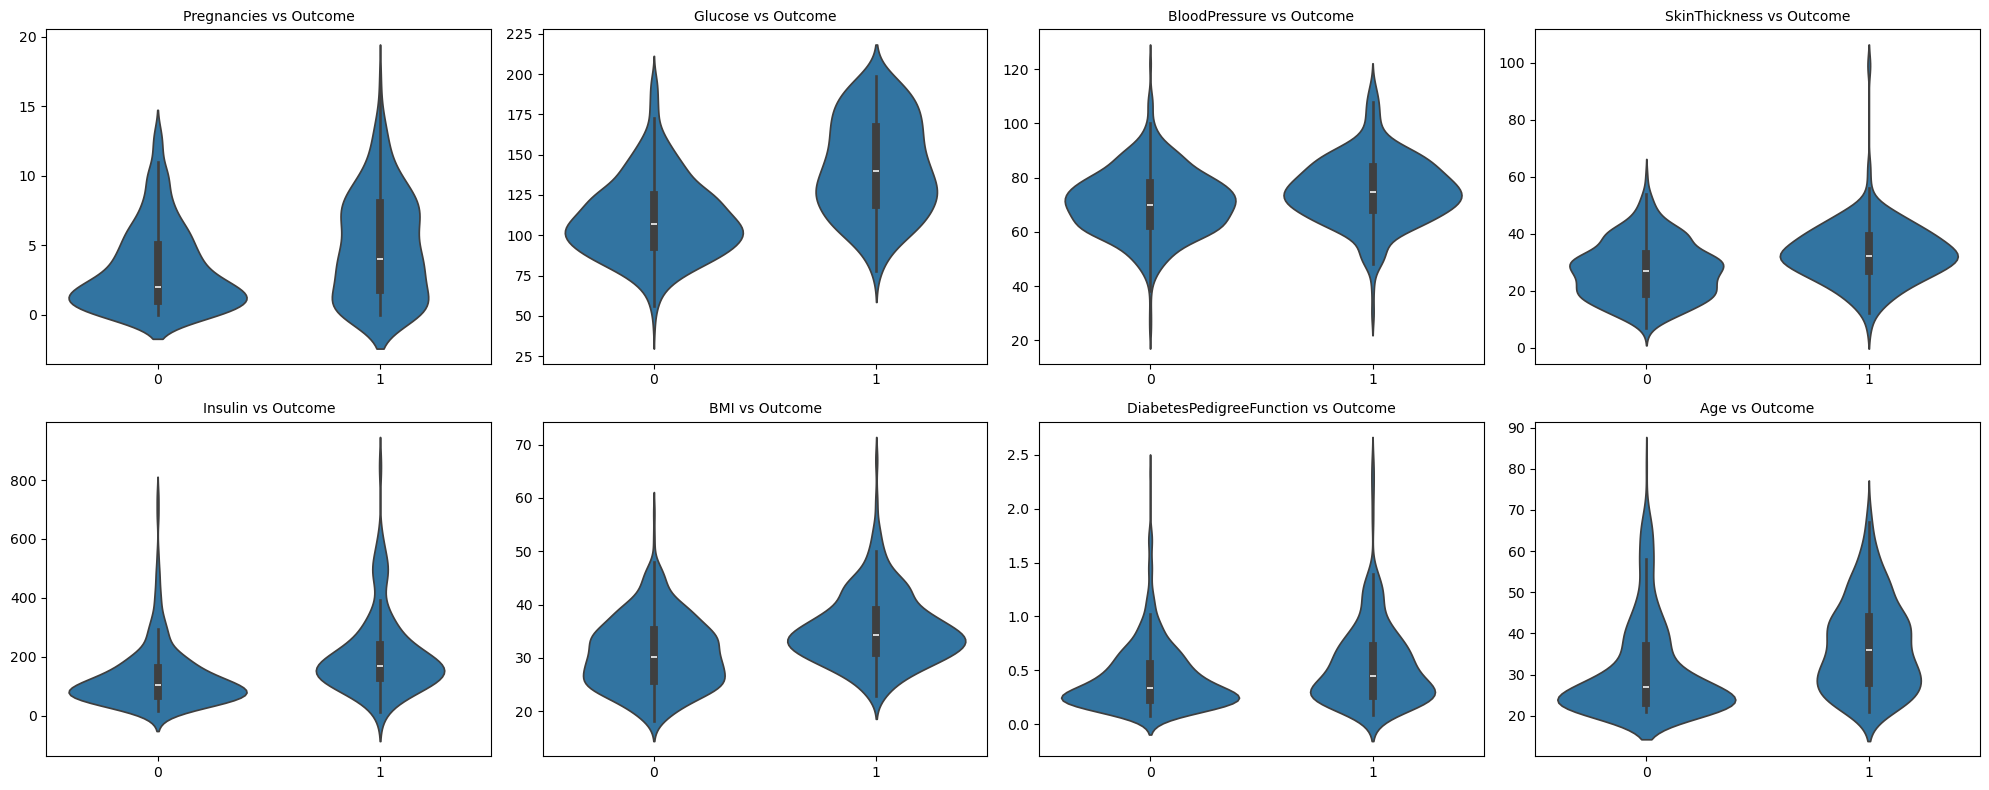

In [15]:
# Bivariant analysis
features = [col for col in df_copy.columns if col != 'Outcome']

# Create 2 rows * 4 columns layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axes = axes.flatten()

# Plot violin plots
for i, col in enumerate(features):
    sns.violinplot(x='Outcome', y=col, data=df_copy, ax=axes[i])
    axes[i].set_title(f'{col} vs Outcome', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Final layout
plt.tight_layout()
plt.show()

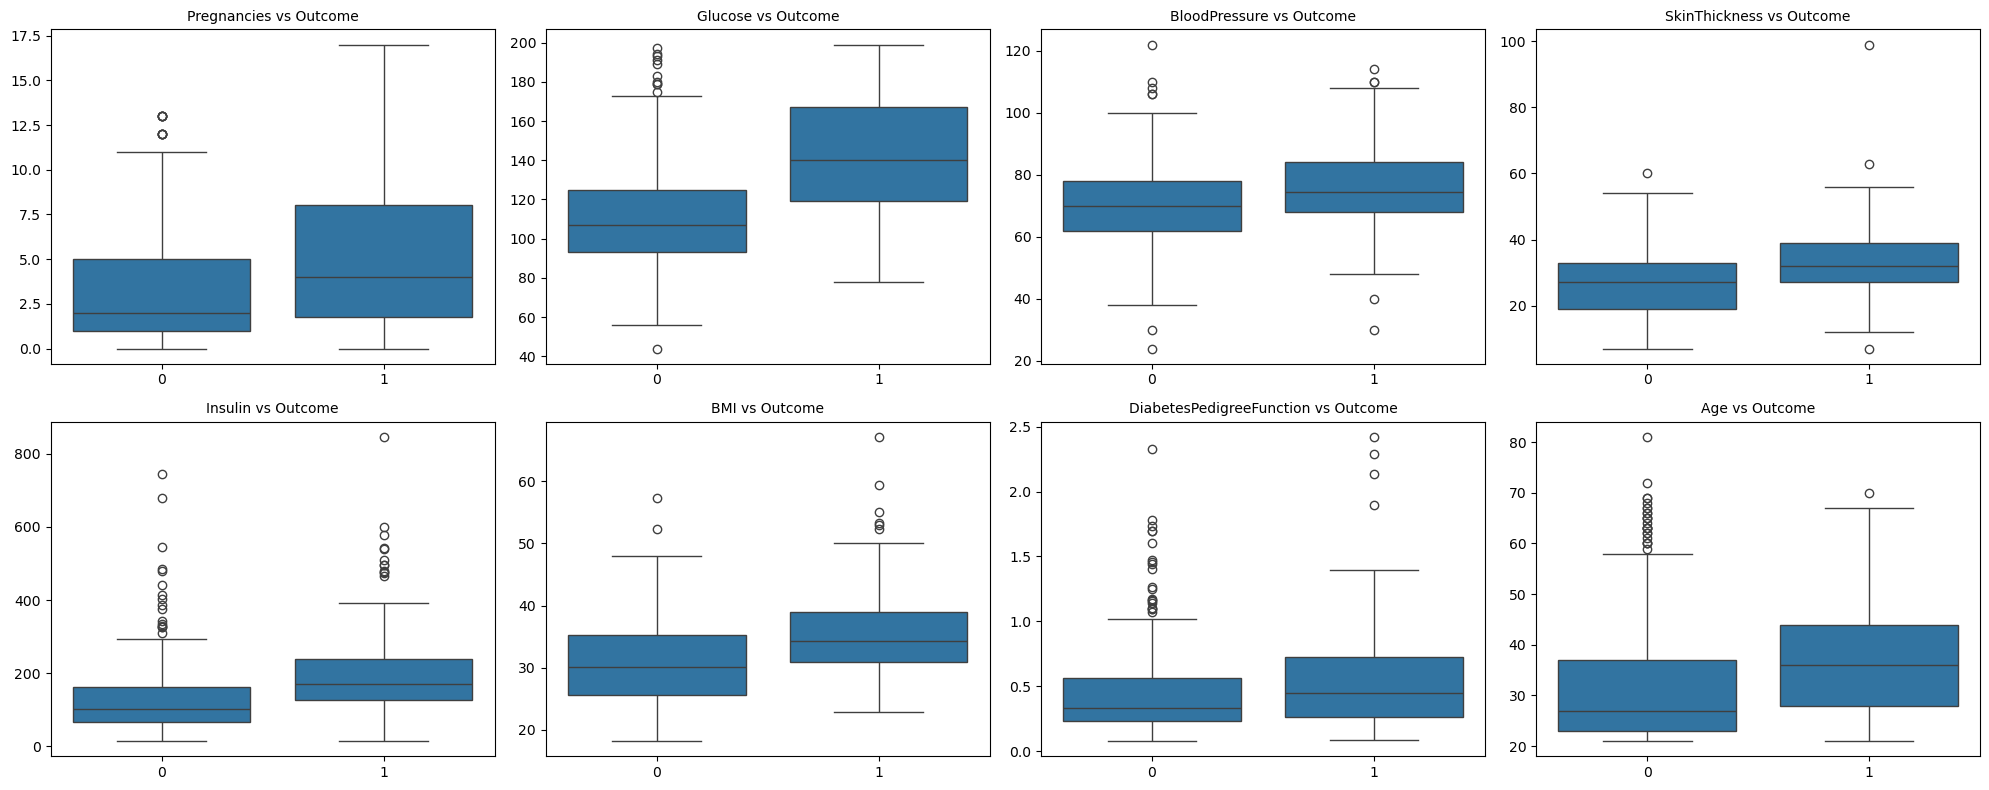

In [16]:
# Bivariant analysis 
features = [col for col in df_copy.columns if col != 'Outcome']

# Create 2 rows * 4 columns = 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(features):
    sns.boxplot(x='Outcome', y=col, data=df_copy, ax=axes[i])
    axes[i].set_title(f'{col} vs Outcome', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Final layout
plt.tight_layout()
plt.show()

# Pre-processing the data

In [18]:
# Filling missing values in 'Glucose' and 'BloodPressure' with their mean
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)

# Fill missing values in 'SkinThickness', 'Insulin', and 'BMI' with their median
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [19]:
#To check the data typees after filling missing values with mean or median
df_copy.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

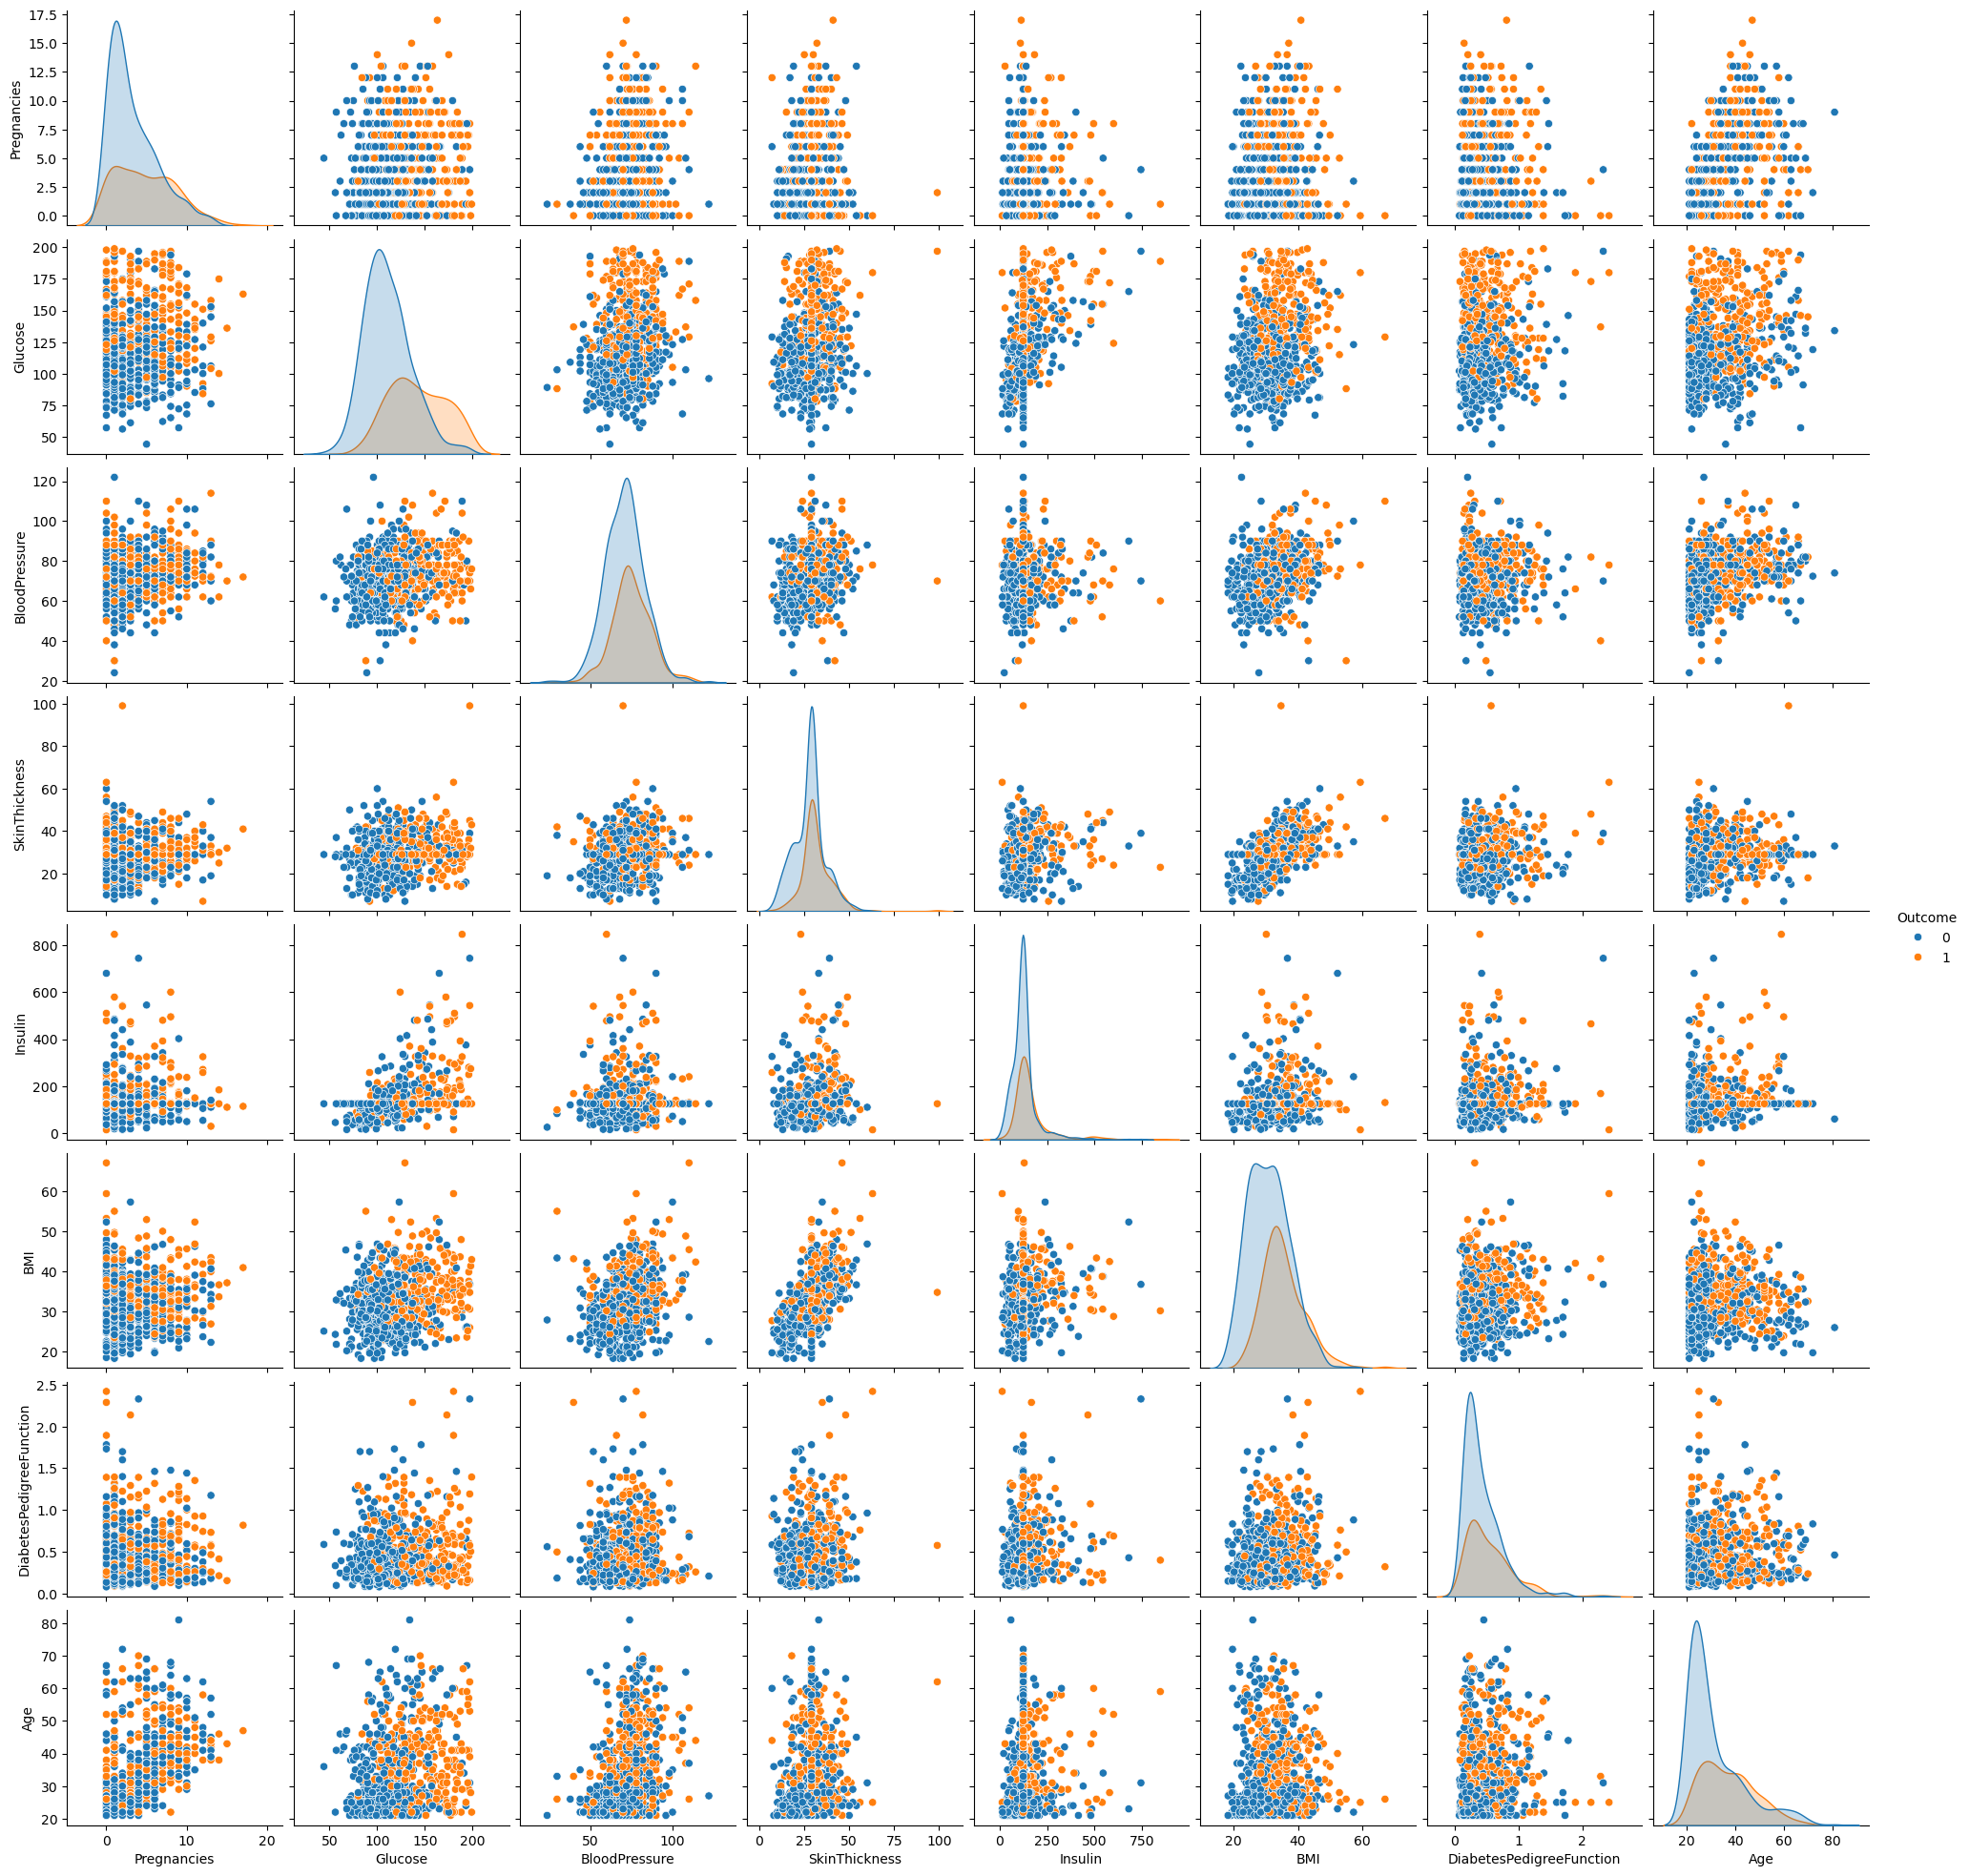

In [20]:
# Creatiing pairwise scatter plots for alll numerical features, colored by the 'Outcome' class
# This helps to visualize relationships between features and how they vary across differeent outcomes
p = sns.pairplot(df_copy, hue='Outcome')

In [21]:
# observing the shape of the data after doing preprocessing to check the number of rows and columns
df_copy.shape

(768, 9)

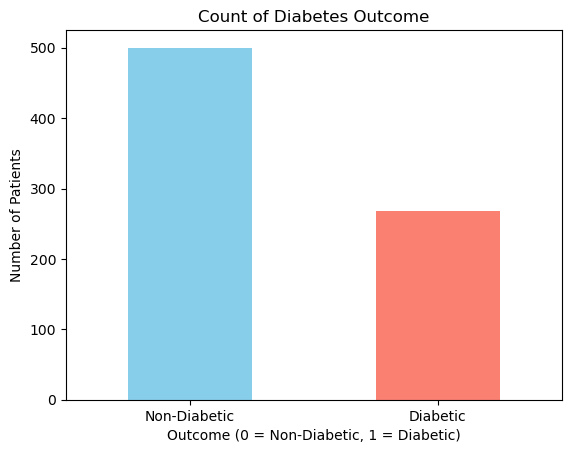

In [22]:
# Count of each class
df_copy['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding labels
plt.title('Count of Diabetes Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'], rotation=0)
plt.show()

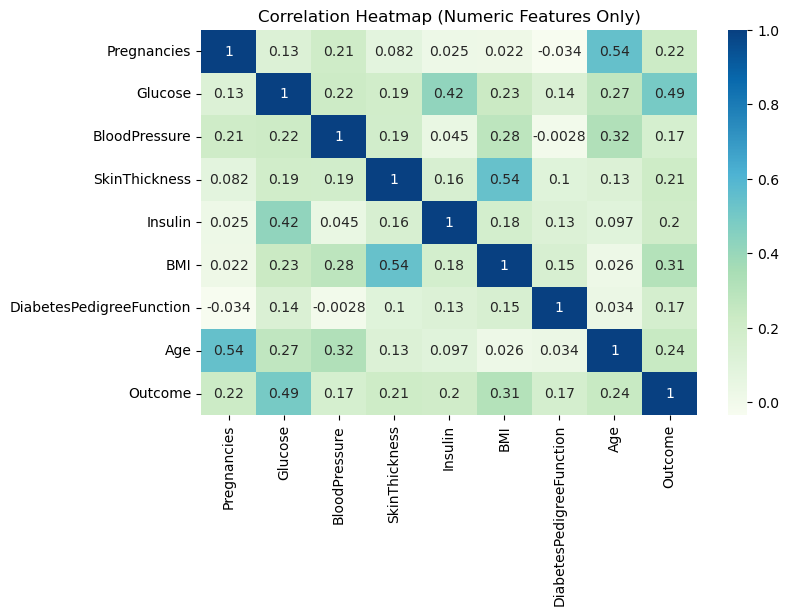

In [23]:
# Plot a heatmap of the correlation matrix to visualize relationships between numerical features
# 'annot=True' displays correlation coefficients on the heatmap
# Select only numeric columns
numeric_df = df_copy.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='GnBu')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [24]:
#To find correlatiion between variables 
numeric_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


# Data Scaling

In [26]:
#To scale the dataframe using standardscaler to bring all the data to same sscale
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

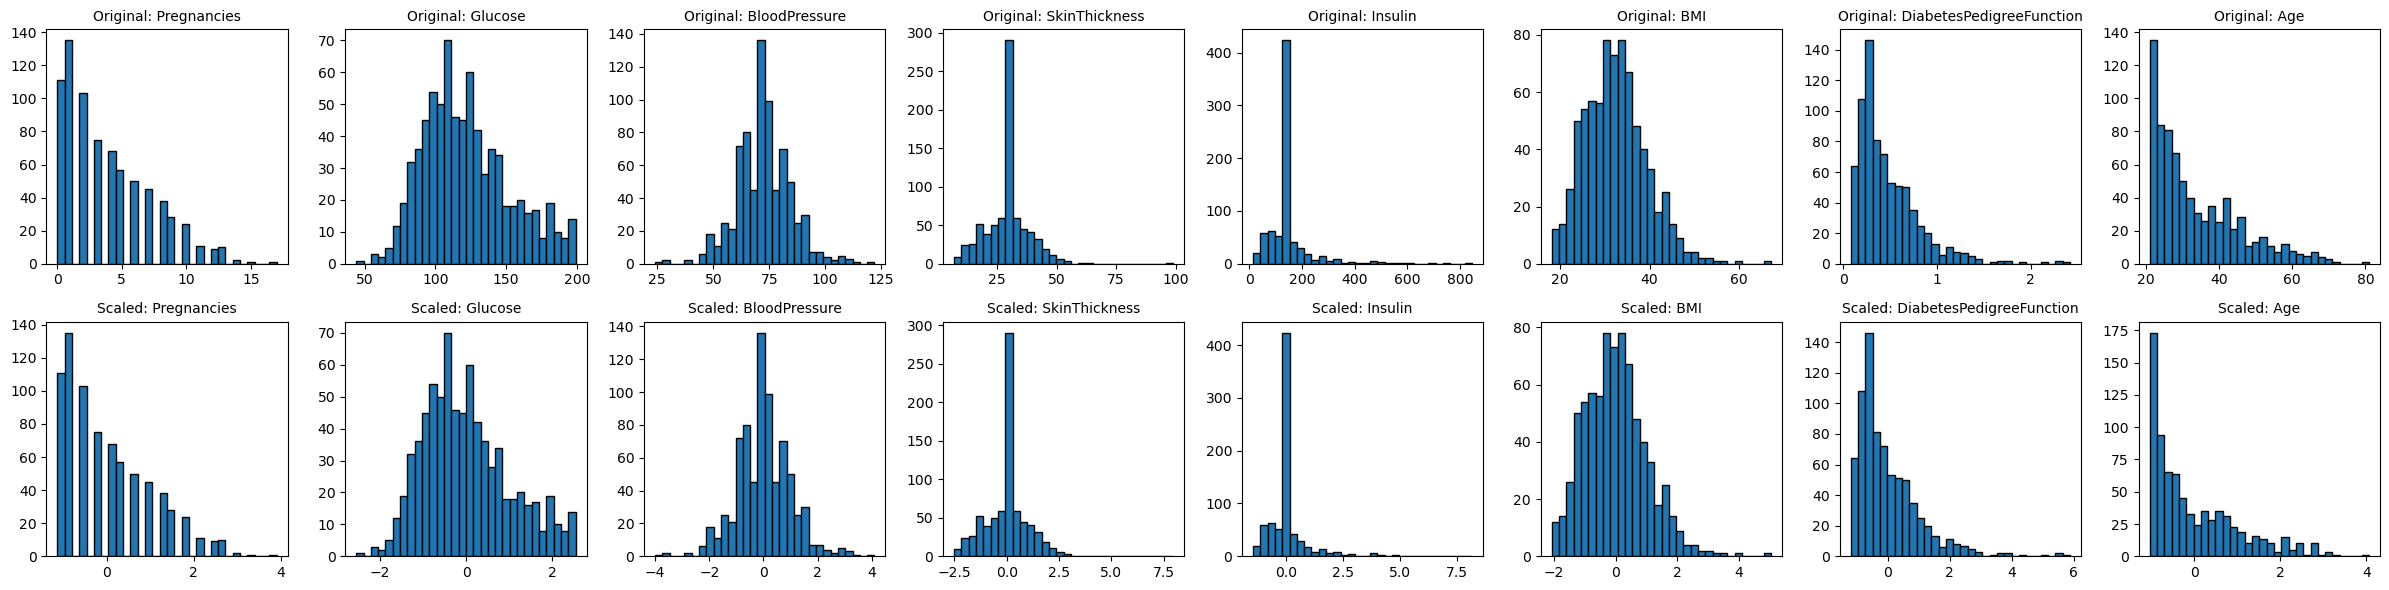

In [27]:
# Before scaling
original_features = df_copy.drop("Outcome", axis=1)

# After scaling
scaled_features = X

# Created subplots
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(24, 6))
axes = axes.flatten()

for i, col in enumerate(original_features.columns):
    # Plot original
    axes[i].hist(original_features[col], bins=30, edgecolor='black')
    axes[i].set_title(f"Original: {col}", fontsize=10)

for i, col in enumerate(scaled_features.columns):
    # Plot scaled
    axes[i + 8].hist(scaled_features[col], bins=30, edgecolor='black')
    axes[i + 8].set_title(f"Scaled: {col}", fontsize=10)

plt.tight_layout()
plt.show()

In [28]:
#Top 5 rows of scaled data
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


# Data Splitting

In [30]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = df_copy.Outcome

In [31]:
#importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Data Modelling

## Logistic Regression 

In [34]:
#Create and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
#Predict on test set
y_pred = log_reg.predict(X_test)

## Logistic Regression Model Evaluation

In [37]:
#Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.73046875

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.64      0.53      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



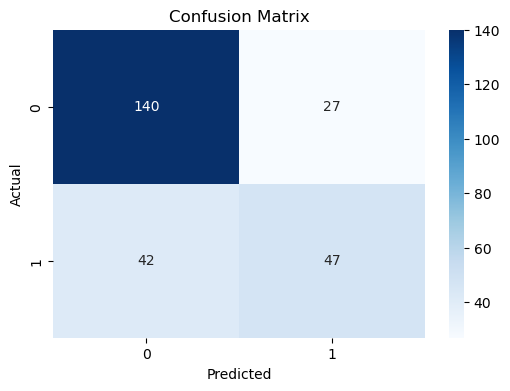

In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ANOVA Test

In [40]:
from scipy.stats import f_oneway

# list of all numerical columns except the target variable 'Outcome'
numerical_columns = df.columns.drop('Outcome')

# Group the dataset by the 'Outcome' column
grouped = df.groupby('Outcome')

# Created an empty list to store ANOVA results
anova_results = []

# one-way ANOVA test for each numerical feature
for column in numerical_columns:
    # Create a list of values for each group for the given feature
    groups = [group[column].values for name, group in grouped]
    
    # Apply ANOVA test to check if means are significantly different between groups
    f_stat, p_value = f_oneway(*groups)
    
    # Store the results
    anova_results.append({
        'Feature': column,
        'F-statistic': f_stat,
        'P-value': p_value
    })

# Convert the results into a DataFrame and sort by lowest P-value -most significant
anova_df = pd.DataFrame(anova_results)
print(anova_df.sort_values('P-value'))

                    Feature  F-statistic       P-value
1                   Glucose   213.161752  8.935432e-43
5                       BMI    71.772072  1.229807e-16
7                       Age    46.140611  2.209975e-11
0               Pregnancies    39.670227  5.065127e-10
6  DiabetesPedigreeFunction    23.871300  1.254607e-06
4                   Insulin    13.281108  2.861865e-04
3             SkinThickness     4.304381  3.834770e-02
2             BloodPressure     3.256950  7.151390e-02


###### Higher F stat and lower p value indicates the feature is strong indicator of diabetic
Glucose
BMI
age
Pregencies
DiabetesPedigreeFunction

###### Small P-value (< 0.05): Strong evidence that the feature is different between diabetics and non-diabetics. Large P-value (> 0.05): The feature might not be useful for classification.

## Logistic Regression with ANOVA-Selected Features

In [43]:
# Select important features identified using ANOVA test
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']

# Define input features (X) and target variable (y)
X = df[selected_features]
y = df['Outcome']

# Split the data into training and testing sets-80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)       
accuracy = accuracy_score(y_test, y_pred)              
report = classification_report(y_test, y_pred)         

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[81 18]
 [20 35]]

Accuracy: 0.7532

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## 5-Fold Cross-Validation with ANOVA-Selected Features

In [45]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Select features with p-value < 0.001 (from ANOVA test)
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
X = df[selected_features]
y = df['Outcome']

# Split the dataset for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# 5-Fold Cross-Validation on training set
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print("5-Fold CV Accuracies:", np.round(cv_scores, 4))
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))

# Train model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate predictions
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nAccuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)


5-Fold CV Accuracies: [0.7886 0.748  0.7236 0.7236 0.7541]
Mean CV Accuracy: 0.7476
Standard Deviation: 0.024

Confusion Matrix:
 [[81 18]
 [20 35]]

Accuracy: 0.7532

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## 5-Fold Cross-Validation with All Features

In [47]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# all features
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 
                     'BloodPressure', 'SkinThickness', 'Insulin']
X = df[selected_features]
y = df['Outcome']

# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# 5-Fold Cross-Validation on training set
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print cross-validation results
print("5-Fold CV Accuracies:", np.round(cv_scores, 4))
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))

# Train on training set
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate predictions
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nAccuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)


5-Fold CV Accuracies: [0.7805 0.7724 0.7073 0.7642 0.7787]
Mean CV Accuracy: 0.7606
Standard Deviation: 0.0273

Confusion Matrix:
 [[78 21]
 [18 37]]

Accuracy: 0.7468

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## KNN Model

In [49]:
# Initialize the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn_model.predict(X_test)

# Print evaluation metrics for KNN model
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")     # Overall accuracy
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")         # Sensitivity-how many actual positives were correctly predicted
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")   # How many predicted positives are actually correct
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")                 # Harmonic mean of precision and recall
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")           # Area under the ROC curve


K-Nearest Neighbors (KNN):
Accuracy: 0.6623
Recall: 0.5246
Precision: 0.5818
F1: 0.5517
AUC: 0.6386


In [50]:
# Lists to store training and testing accuracy scores
test_scores = []
train_scores = []

# Try different values of k from 1 to 14
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)  # Create KNN model with k = i
    knn.fit(X_train, y_train)                  # Train the model on training data
    
    # Store the accuracy on training and test sets
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


## Evaluation of KNN

In [52]:
## score that comes from testing on the same datapoints used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [53]:
## score that comes from testing on the datapoints used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.92207792207793 % and k = [12]


In [54]:
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_model.predict(X_test)))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



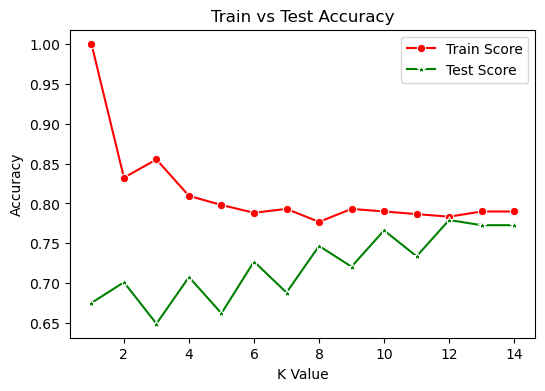

In [55]:
# Set the size of the plot
plt.figure(figsize=(6, 4))

# Plot training accuracy scores for different k values
sns.lineplot(x=range(1, 15), y=train_scores, marker='o', label='Train Score', color='red')

# Plot test accuracy scores for different k values
sns.lineplot(x=range(1, 15), y=test_scores, marker='*', label='Test Score', color='green')

# Add labels and title
plt.xlabel('K Value')          # X-axis: different values of k
plt.ylabel('Accuracy')         # Y-axis: accuracy scores
plt.title('Train vs Test Accuracy')  # Title of the plot
plt.legend()                   # Show legend for the lines

# Display the plot
plt.show()

Training Data:

k = 1 is too flexible and fits training data too well (low bias, high variance).

When k = 1, the model correctly classified 100% of the training data. This likely indicates overfitting – the model is memorizing the training data rather than generalizing well.
Overfitting is common when k is very low (especially k = 1), because the model always picks the closest point (which is the point itself in training).

k = 11 finds a balance between bias and variance, giving better performance on new data.

## KNN with Cross Validation to tune k

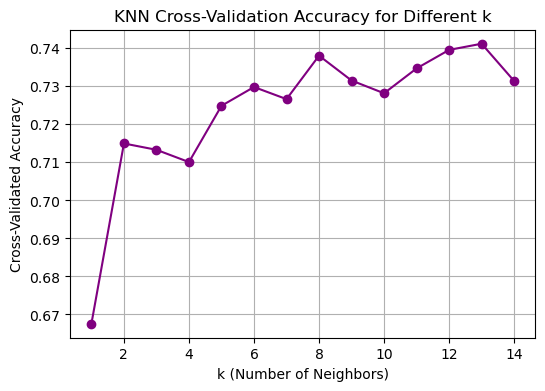

Best k based on cross-validation is: 13


In [59]:
# Store the mean cross-validation scores
cv_scores = []

# Try k values from 1 to 14
k_range = range(1, 15)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=8, scoring='accuracy')
    cv_scores.append(scores.mean())  # Store the average accuracy

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(k_range, cv_scores, marker='o',color='purple')
plt.title('KNN Cross-Validation Accuracy for Different k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Best k
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f'Best k based on cross-validation is: {best_k}')

High Bias = Model is too simple, can't capture patterns → Low training & test accuracy → Underfitting

High Variance = Model is too complex, fits training data too well but fails to generalize → High training accuracy, low test accuracy → Overfitting

## Bias-Variance Tradeoff in KNN

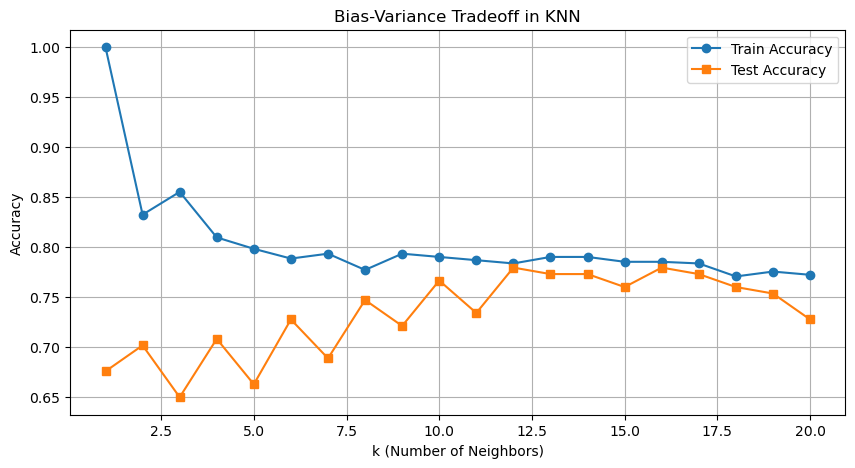

In [62]:
train_scores = []
test_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Accuracy on training set
    train_acc = accuracy_score(y_train, model.predict(X_train))
    train_scores.append(train_acc)

    # Accuracy on test set
    test_acc = accuracy_score(y_test, model.predict(X_test))
    test_scores.append(test_acc)

# Plotting the trade-off
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff in KNN')
plt.legend()
plt.grid(True)
plt.show()

Big gap between training and testing accuracy = High variance (overfitting)

Both low = High bias (underfitting)

Small gap, both reasonably high = Good balance

## Comaprison of KNN- Accuracy with ANOVA Features at CV=3, CV=5, CV=6 and CV=8

Best k for cv=3: 8 with accuracy 0.7492
Best k for cv=5: 8 with accuracy 0.7428
Best k for cv=6: 8 with accuracy 0.7426
Best k for cv=8: 8 with accuracy 0.7381


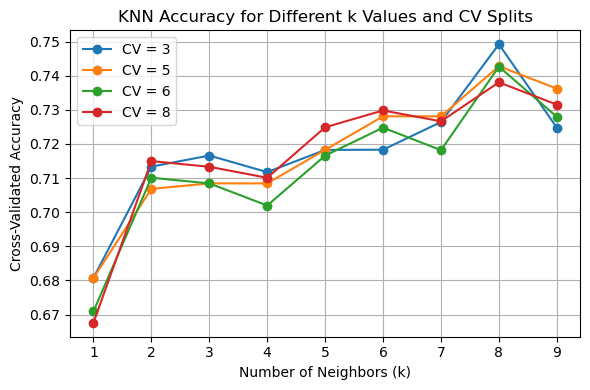

In [65]:
# Range of k values to test
k_range = range(1, 10)
 
# Store scores for each cv setting
cv3_scores = []
cv5_scores = []
cv6_scores = []
cv8_scores = []
 
# Loop over each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
 
    #Cross-validation with cv=3
    scores_cv3 = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv3_scores.append(scores_cv3.mean())
 
    # Cross-validation with cv=5
    scores_cv5 = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv5_scores.append(scores_cv5.mean())
 
    # Cross-validation with cv=6
    scores_cv6 = cross_val_score(knn, X_train, y_train, cv=6, scoring='accuracy')
    cv6_scores.append(scores_cv6.mean())
 
    # Cross-validation with cv=8
    scores_cv8 = cross_val_score(knn, X_train, y_train, cv=8, scoring='accuracy')
    cv8_scores.append(scores_cv8.mean())
 
# Print best k for each
best_k_cv3 = k_range[cv3_scores.index(max(cv3_scores))]
best_k_cv5 = k_range[cv5_scores.index(max(cv5_scores))]
best_k_cv6 = k_range[cv6_scores.index(max(cv6_scores))]
best_k_cv8 = k_range[cv8_scores.index(max(cv8_scores))]
 
print(f"Best k for cv=3: {best_k_cv3} with accuracy {max(cv3_scores):.4f}")
print(f"Best k for cv=5: {best_k_cv5} with accuracy {max(cv5_scores):.4f}")
print(f"Best k for cv=6: {best_k_cv6} with accuracy {max(cv6_scores):.4f}")
print(f"Best k for cv=8: {best_k_cv8} with accuracy {max(cv8_scores):.4f}")
 
# Plot the comparison of accuracy scores for different k values
plt.figure(figsize=(6, 4))
plt.plot(k_range, cv3_scores, marker='o', label='CV = 3')
plt.plot(k_range, cv5_scores, marker='o', label='CV = 5')
plt.plot(k_range, cv6_scores, marker='o', label='CV = 6')
plt.plot(k_range, cv8_scores, marker='o', label='CV = 8')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for Different k Values and CV Splits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
 
# Prepare features and target
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
X = df[selected_features]
y = df['Outcome']
 
# Define k values and cv values to test
k_range = range(1, 10)
cv_values = [3, 5, 6, 8]
 
# Loop over each CV value
for cv in cv_values:
    best_k = None
    best_score = 0
 
    # Find best k for current CV
    for k in k_range:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=k))
        ])
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_k = k
 
    # Print best k info
    print(f"\nBest k for CV={cv} is {best_k} with mean accuracy = {best_score:.4f}")
 
    # Generate predictions and classification report
    final_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=best_k))
    ])
    y_pred = cross_val_predict(final_pipeline, X, y, cv=cv)
    print(f"\nClassification Report for CV={cv}, k={best_k}:")
    print(classification_report(y, y_pred))


Best k for CV=3 is 8 with mean accuracy = 0.7461

Classification Report for CV=3, k=8:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       500
           1       0.69      0.49      0.57       268

    accuracy                           0.75       768
   macro avg       0.73      0.69      0.70       768
weighted avg       0.74      0.75      0.73       768


Best k for CV=5 is 9 with mean accuracy = 0.7487

Classification Report for CV=5, k=9:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       500
           1       0.66      0.58      0.62       268

    accuracy                           0.75       768
   macro avg       0.72      0.71      0.72       768
weighted avg       0.74      0.75      0.74       768


Best k for CV=6 is 7 with mean accuracy = 0.7604

Classification Report for CV=6, k=7:
              precision    recall  f1-score   support

           0       0.80    

Logistic Regression - Train Accuracy: 0.7671
Logistic Regression - Test Accuracy : 0.7532
KNN - Train Accuracy                : 0.8078
KNN - Test Accuracy                 : 0.7597


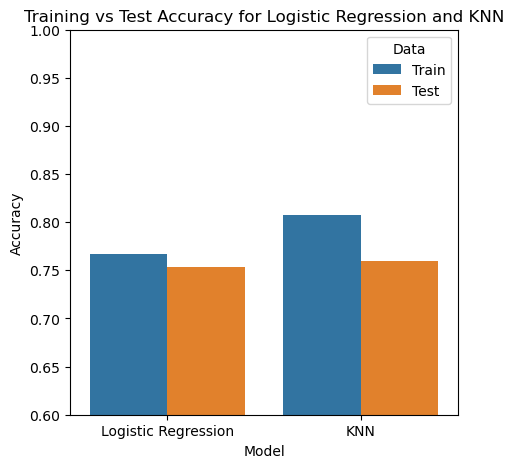

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
# Assuming df is already loaded and cleaned
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
X = df[selected_features]
y = df['Outcome']
 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_train_acc = accuracy_score(y_train, log_model.predict(X_train))
log_test_acc = accuracy_score(y_test, log_model.predict(X_test))
 
# KNN
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_test_acc = accuracy_score(y_test, knn_model.predict(X_test))
 
# Print accuracy values
print("Logistic Regression - Train Accuracy:", round(log_train_acc, 4))
print("Logistic Regression - Test Accuracy :", round(log_test_acc, 4))
print("KNN - Train Accuracy                :", round(knn_train_acc, 4))
print("KNN - Test Accuracy                 :", round(knn_test_acc, 4))
 
# Prepare data for plotting
model_names = ['Logistic Regression', 'Logistic Regression', 'KNN', 'KNN']
data_type = ['Train', 'Test', 'Train', 'Test']
accuracies = [log_train_acc, log_test_acc, knn_train_acc, knn_test_acc]
plot_df = pd.DataFrame({'Model': model_names, 'Data': data_type, 'Accuracy': accuracies})
 
# Plot
plt.figure(figsize=(5, 5))
sns.barplot(data=plot_df, x='Model', y='Accuracy', hue='Data')
plt.title('Training vs Test Accuracy for Logistic Regression and KNN')
plt.ylim(0.6, 1.0)
plt.ylabel('Accuracy')
plt.show()